### รหัส 63041013ภ8
### ชื่อ-นามสกุล: นางสาวพรชิตา ไข่แก้ว
### กลุ่ม 2

### จุดประสงค์
1. เพื่อเข้าใจการเตรียมข้อมูลสำหรับการพยากรณ์รูปภาพ C2-Lab1
2. เพื่อเข้าใจและประยุกต์ใช้การพยากรณ์รูปภาพเบื้องต้น สำหรับการจำแนกภาษามือ 
3. เพื่อเข้าใจการแปลง Tensorflow เป็น Tensorflow lite สำหรับอุปกรณ์มือถือ

### ขั้นตอนการทำงาน
1. ทำการเตรียมข้อมูลสำหรับ Model ตามวีธีการใน C2-Lab1 (ระดับ 5 คะแนน)
  - ทำการสร้าง Directory ชื่อว่า SignLanguage 
  - ทำการจัดเตรียมข้อมูลวีดีโอ จำนวน 10 วีดีโอ
  - สร้างไดเร็คทรอรีเป็นชื่อคำ ภายในไดเร็คทรอรี SignLanguage ตัวอย่างเช่น /SignLanguage/goodbye สำหรับจัดเก็บเฟรมของวีดีโอทั้ง 10 วีดีโอ
2. ทำการสร้าง Model สำหรับการจำแนกภาษามือ (ระดับ 10 คะแนน)
3. ทำการเปลี่ยน Tensorflow model เป็น Tensorflow lite model สำหรับ Mobile   (ระดับ 15 คะแนน)

## ขั้นตอนที่ 1
ทำการติดตั้งแพ็คเกจ Model Maker ที่อยู่ใน GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker)

In [1]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 642 kB 21.0 MB/s 
     |████████████████████████████████| 3.4 MB 48.9 MB/s 
     |████████████████████████████████| 1.2 MB 38.9 MB/s 
     |████████████████████████████████| 596 kB 51.1 MB/s 
     |████████████████████████████████| 840 kB 60.9 MB/s 
     |████████████████████████████████| 1.1 MB 52.9 MB/s 
     |████████████████████████████████| 78 kB 4.3 MB/s 
     |████████████████████████████████| 87 kB 7.3 MB/s 
     |████████████████████████████████| 6.4 MB 41.5 MB/s 
     |████████████████████████████████| 238 kB 46.4 MB/s 
     |████████████████████████████████| 10.9 MB 43.8 MB/s 
     |████████████████████████████████| 55.3 MB 1.7 MB/s 
     |████████████████████████████████| 120 kB 56.0 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 352 kB 69.9 MB/s 
     |████████████████████████████████| 99 kB 9.6 MB/s 
     |████████████████████████████████| 48.3 MB 97 kB/s 
     |██████████████

### ขั้นตอนที่ 2
นำเข้าแพ็คเกจที่จำเป็น

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


### ขั้นตอนที่ 3
การจัดเตรียมข้อมูลภาษามือจากวีดีโอ  จากการปฏิบัติในบทที่ 2 (C2-Lab)


### ขั้นตอนที่ 4 
โหลดข้อมูลสำหรับ ML บนอุปกรณ์ โดยทำการแยกออกเป็นข้อมูลการฝึกอบรม (training data) และข้อมูลการทดสอบ (testing data)
- 90% สำหรับการฝึกอบรม
- 10% สำหรับการทดสอบ

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image_path = '/content/drive/MyDrive/SignLanguageDataset/SignLanguage/'
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 1000, num_label: 12, labels: .ipynb_checkpoints, do, dontknow, full, hate, hello, hungry, love, make, tomorrow, why, yesterday.


### ขั้นตอนที่ 5
ทำการสร้างโมเดล TensorFlow

In [5]:
model = image_classifier.create(train_data)
model.summary()

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 12)                15372     
                                                                 
Total params: 3,428,396
Trainable params: 15,372
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
28/28 [==============================] - 161s 5s/step - loss: 2.0110 - accuracy: 0.3694
Epoch 2/5
28/28 [==============================] - 27s 951ms/step - loss: 1.1011 - accuracy: 0.

Step 3. Evaluate the model.

ขั้นตอนที่ 6 
ประเมินประสิทธิภาพของโมเดลที่ได้ทำการสร้างขึ้น

In [6]:
loss, accuracy = model.evaluate(test_data)
print(f"loss:={loss}, accuracy:={accuracy}")

4/4 [==============================] - 17s 3s/step - loss: 0.6942 - accuracy: 0.9200
loss:=0.6941813826560974, accuracy:=0.9200000166893005


### ขั้นตอนที่ 7
เราสามารถพล็อตผลลัพธ์ที่คาดการณ์ไว้ในภาพทดสอบจำนวน 100 ภาพ การคาดการณ์ สีแดงคือ ผลลัพธ์ที่คาดการณ์ไว้ผิด ในขณะที่แบบอื่นๆ ถูกต้อง

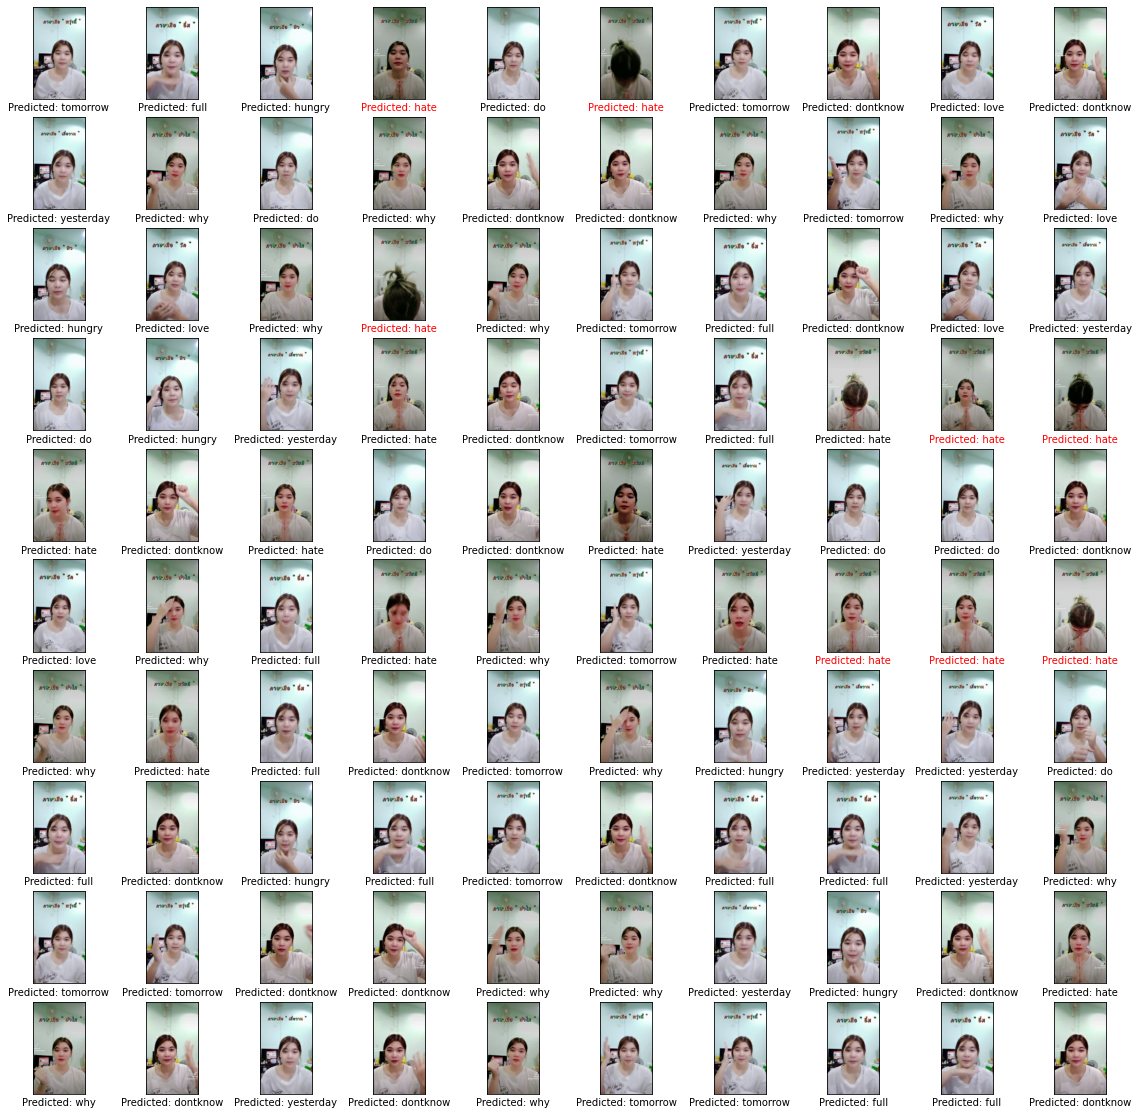

In [7]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

### ขั้นตอนที่ 8 

การส่งออกโมเดลสู่ TensorFlow Lite ด้วยข้อมูลเมตา [(metadata)](https://www.tensorflow.org/lite/convert/metadata) ซึ่งเป็นมาตรฐานสำหรับการอธิบายโมเดล โดยที่ไฟล์ป้ายกำกับ (Label file) ถูกฝังอยู่ในข้อมูลเมตา 
หลังจากขั้นตอนนี้ เราก็สามารถใช้ไฟล์โมเดล TensorFlow Lite ในแอปพลิเคชันบนอุปกรณ์มือถือได้

In [8]:
model.export(export_dir='/content/drive/MyDrive/SignLanguageDataset/')

INFO:tensorflow:Assets written to: /tmp/tmp003tiq_8/assets


INFO:tensorflow:Assets written to: /tmp/tmp003tiq_8/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp6mut4ooa/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp6mut4ooa/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/SignLanguageDataset/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/SignLanguageDataset/model.tflite
